# Clothes Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We are going to use a new version of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Fashion MNIST (https://pravarmahajan.github.io/fashion/) and is a dataset of small images of clothes and accessories.



The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
import sklearn.metrics as skm
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

In [2]:
# helper function to load Fashion MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 1206077 #replace with your ID
np.random.seed(ID)

In [4]:
#load the Fashion MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255

Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [57 47 52 53 42 42 65 45 45 52]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


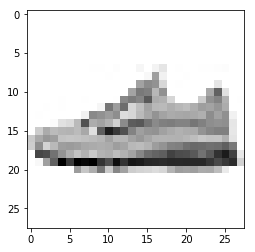

LABEL: 7
INPUT:


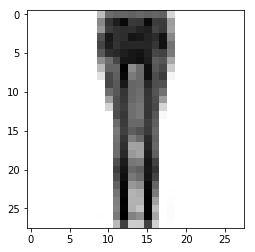

LABEL: 1
INPUT:


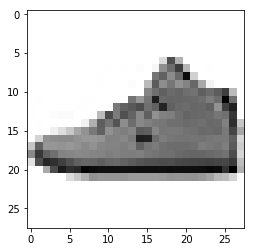

LABEL: 7
INPUT:


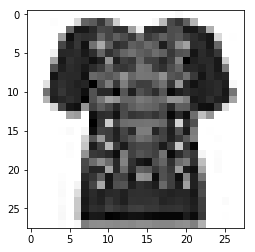

LABEL: 6


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)
plot_input(X_test,y_test,10000)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 5-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
import pandas as pd
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

#grid of parameters for your SVC
#param_grid = [
 #{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  #{'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001], 'kernel': ['rbf']},
  #{'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001], 'kernel': ['poly']},
 #]

# parameters for linear SVM
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

#RUN linear SVM

SuppVM = SVC(kernel='linear')
clf = GridSearchCV(SuppVM, parameters, cv=5,return_train_score=True)
clf.fit(X_train,y_train)


print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:")

print(clf.best_params_)
print("Score with best parameters:")
print(clf.best_score_)

print("All scores on the grid:")
risultati=pd.DataFrame(clf.cv_results_ )
risultati[['mean_test_score','param_C']]

RESULTS FOR LINEAR KERNEL
Best parameters set found:
{'C': 0.1}
Score with best parameters:
0.78
All scores on the grid:


,mean_test_score,param_C
0,0.528,0.001
1,0.740,0.01
2,0.780,0.1
3,0.772,1
4,0.772,10
5,0.772,100


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1.]}

#run SVM with poly of degree 2 kernel

SuppVM = SVC(kernel='poly',degree=2)
clf = GridSearchCV(SuppVM, parameters, cv=5,return_train_score=True)
clf.fit(X_train,y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
risultati=pd.DataFrame(clf.cv_results_ )
risultati[['mean_test_score','param_C','param_gamma']]

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found:
{'C': 0.1, 'gamma': 0.1}
Score with best parameters:
0.736

All scores on the grid:


,mean_test_score,param_C,param_gamma
0,0.140,0.01,0.01
1,0.726,0.01,0.1
2,0.732,0.01,1
3,0.622,0.1,0.01
4,0.736,0.1,0.1
5,0.736,0.1,1
6,0.726,1,0.01
7,0.732,1,0.1
8,0.736,1,1


## TO DO 3

Now let's try a higher degree for the polynomial kernel.

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1.]}

#run SVM with poly of higher degree kernel
SuppVM = SVC(kernel='poly',degree=3)
clf = GridSearchCV(SuppVM, parameters, cv=5,return_train_score=True)
clf.fit(X_train,y_train)

print ('RESULTS FOR POLY DEGREE=', 3, ' KERNEL')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
risultati=pd.DataFrame(clf.cv_results_ )
risultati[['mean_test_score','param_C','param_gamma']]

RESULTS FOR POLY DEGREE= 3  KERNEL
Best parameters set found:
{'C': 0.1, 'gamma': 0.1}
Score with best parameters:
0.726

All scores on the grid:


,mean_test_score,param_C,param_gamma
0,0.378,0.01,0.01
1,0.696,0.01,0.1
2,0.710,0.01,1
3,0.604,0.1,0.01
4,0.726,0.1,0.1
5,0.710,0.1,1
6,0.698,1,0.01
7,0.710,1,0.1
8,0.710,1,1


## TO DO4 
What do you observe when fitting a higher degree polynomial on this dataset?

In [11]:
#provando con un grado ancora più alto
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1.]}

#run SVM with poly of higher degree kernel
SuppVM = SVC(kernel='poly',degree=5)
clf = GridSearchCV(SuppVM, parameters, cv=5,return_train_score=True)
clf.fit(X_train,y_train)

print ('RESULTS FOR POLY DEGREE=', 5, ' KERNEL')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
risultati=pd.DataFrame(clf.cv_results_ )
risultati[['mean_test_score','param_C','param_gamma']]


parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1.]}

#run SVM with poly of higher degree kernel
SuppVM = SVC(kernel='poly',degree=6)
clf = GridSearchCV(SuppVM, parameters, cv=5,return_train_score=True)
clf.fit(X_train,y_train)

print ('RESULTS FOR POLY DEGREE=', 6, ' KERNEL')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
risultati=pd.DataFrame(clf.cv_results_ )
risultati[['mean_test_score','param_C','param_gamma']]

RESULTS FOR POLY DEGREE= 5  KERNEL
Best parameters set found:
{'C': 0.01, 'gamma': 0.1}
Score with best parameters:
0.678

All scores on the grid:
RESULTS FOR POLY DEGREE= 6  KERNEL
Best parameters set found:
{'C': 0.01, 'gamma': 0.1}
Score with best parameters:
0.64

All scores on the grid:


,mean_test_score,param_C,param_gamma
0,0.436,0.01,0.01
1,0.640,0.01,0.1
2,0.634,0.01,1
3,0.552,0.1,0.01
4,0.634,0.1,0.1
5,0.634,0.1,1
6,0.616,1,0.01
7,0.634,1,0.1
8,0.634,1,1


 ## risposta
come si può osservare dai risultati ottenuti più si alza il grado più lo score risulta basso. 

## TO DO 5
Pick a model for the Radial Basis Function kernel:

In [12]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.01,0.1]}

#run SVM with rbf kernel
SuppVM = SVC(kernel='rbf')
clf = GridSearchCV(SuppVM, parameters, cv=5,return_train_score=True)
clf.fit(X_train,y_train)




print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
risultati=pd.DataFrame(clf.cv_results_ )
risultati[['mean_test_score','param_C','param_gamma']]

RESULTS FOR rbf KERNEL
Best parameters set found:
{'C': 100, 'gamma': 0.01}
Score with best parameters:
0.788

All scores on the grid:


,mean_test_score,param_C,param_gamma
0,0.130,0.1,0.001
1,0.508,0.1,0.01
2,0.508,0.1,0.01
3,0.130,0.1,0.1
4,0.654,1,0.001
5,0.754,1,0.01
6,0.754,1,0.01
7,0.510,1,0.1
8,0.762,10,0.001
9,0.784,10,0.01


## TO DO 6
Report here the best SVM kernel and parameters

In [13]:
#get training and test error for the best SVM model from CV

best_SVM = SVC(C=100,gamma=0.01,kernel='rbf')
best_SVM.fit(X_train,y_train)



training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.205025


## More data
Now let's do the same but using more data points for training.

### TO DO 7
Choose a new number of data points.

In [14]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [197 216 202 208 209 196 206 190 197 179]


Let's try to use SVM with parameters obtained from the best model for $m_{training} =  500$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the TO DO 9 cell below.

In [15]:
#get training and test error for the best SVM model from CV

best_SVM = SVC(C=100,gamma=0.01,kernel='rbf')
best_SVM.fit(X_train,y_train)

training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.157845


Just for comparison, let's also use logistic regression (with standard parameters from scikit-learn, i.e. some regularization is included).

In [16]:
from sklearn import linear_model
from sklearn import metrics

regression =   linear_model.LogisticRegression()
regression.fit(X_train,y_train)

Y_pred_train=regression.predict(X_train)
Y_pred_test=regression.predict(X_test)

training_error= 1- metrics.accuracy_score(y_train, Y_pred_train)
test_error= 1- metrics.accuracy_score(y_test, Y_pred_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.032500
Best logistic regression test error: 0.181328


## TO DO 9
Compare and discuss:
- the results from SVM with m=500 and with m=30000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

In [17]:
X = X[permutation]
y = y[permutation]

m_training = 30000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

#get training and test error for the best SVM model from CV

best_SVM = SVC(C=100,gamma=0.01,kernel='rbf')
best_SVM.fit(X_train,y_train)

training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

from sklearn import linear_model
from sklearn import metrics

regression =   linear_model.LogisticRegression()
regression.fit(X_train,y_train)

Y_pred_train=regression.predict(X_train)
Y_pred_test=regression.predict(X_test)

training_error= 1- metrics.accuracy_score(y_train, Y_pred_train)
test_error= 1- metrics.accuracy_score(y_test, Y_pred_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [2972 3044 2958 2984 2999 3013 3008 3020 3006 2996]
Best SVM training error: 0.000100
Best SVM test error: 0.111967
Best logistic regression training error: 0.115500
Best logistic regression test error: 0.150467


## risposta

SVM con m=500 e m=30000:
si ha che aumentando la dimensione del training set si migliora notevolmente l'errore sul test set.


Per quanto riguarda invece la L.R. si ha che essa ha uno score inferiore rispetto all' SVM quindi in un problema di questo tipo è preferibile utilizzare un procedimento basato sull' SVM.


si ha in oltre che il guadagno in errore aumentando la dimensione del training set è maggiore nel caso dell'SVM rispetto alla L.R.

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

3 != 4
INPUT:


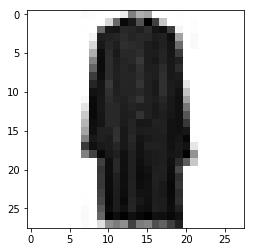

LABEL: 4


In [18]:
LR_prediction = regression.predict(X_test)
SVM_prediction = best_SVM.predict(X_test)


for i in range(len(y_test)):
    if (y_test[i]!=LR_prediction[i] )and (y_test[i]==SVM_prediction[i]):
        print(LR_prediction[i],'!=',SVM_prediction[i])
        plot_input(X_test, y_test, i)
        break
        

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by dividing each row for the number of samples in each class in order to measure the accuracy on each single class.


In [19]:

np.set_printoptions(precision=2, suppress=True,floatmode='fixed') # for better aligned printing of confusion matrix

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = sklearn.metrics.confusion_matrix(y_test,SVM_prediction)

print("\n Confusion matrix SVM  \n \n", confusion_SVM)

Conf_norm_SVM=confusion_SVM/counts
print('\n normalized \n',Conf_norm_SVM)

confusion_LR = sklearn.metrics.confusion_matrix(y_test,LR_prediction)

print("\n Confusion matrix LR  \n \n", confusion_LR)

Conf_norm_LR=confusion_LR/counts
print('\n normalized \n',Conf_norm_LR)

Labels and frequencies in test set:  [3028 2956 3042 3016 3001 2987 2992 2980 2994 3004]

 Confusion matrix SVM  
 
 [[2584    5   42   66    5    4  294    1   27    0]
 [  12 2891    3   42    3    1    3    0    1    0]
 [  70    3 2497   27  225    1  209    0   10    0]
 [  90   25   30 2714   84    0   68    0    5    0]
 [  13    3  274   98 2420    0  185    0    7    1]
 [   1    0    0    0    0 2869    0   72   15   30]
 [ 378    6  279   73  168    1 2069    0   18    0]
 [   0    0    0    0    0   72    0 2811    2   95]
 [  15    2   12    6   10    6   30    6 2906    1]
 [   0    0    0    1    0   29    0   93    1 2880]]

 normalized 
 [[0.85 0.00 0.01 0.02 0.00 0.00 0.10 0.00 0.01 0.00]
 [0.00 0.98 0.00 0.01 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.02 0.00 0.82 0.01 0.07 0.00 0.07 0.00 0.00 0.00]
 [0.03 0.01 0.01 0.90 0.03 0.00 0.02 0.00 0.00 0.00]
 [0.00 0.00 0.09 0.03 0.81 0.00 0.06 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.96 0.00 0.02 0.01 0.01]
 [0.12 0.00 0.09 0.

## TO DO 12
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.


## risposta

guardando la confusion matrix si osserva che la classe classificata nel peggior modo è quella delle camice, si ha infatti il minor valore in diagonale nella posizione corrispondente ad esse. La giustificazione potrebbe essere ricercata nel fatto che tale classe è quella che più si confonde con le altre.